<style>
body {
    max-width: 900px;
    margin: 40px auto;
    padding: 0 20px;
    font-family: "Georgia", serif;
    line-height: 1.6;
}
</style>

<div style="text-align: center; padding: 60px 60px">
  <h1 style="font-weight: bold; font-size: 3.1em">
    PRECIPITACIÓN EN PUEBLA CON TRANSFORMACION YEO-JHONSON
  </h1>
</div>



Precipitación v4:  
https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-monthly
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/
https://www.ncei.noaa.gov/pub/data/ghcn/v4/products/StationPlots/MX/


Nombres:  
https://www.ncei.noaa.gov/pub/data/ghcn/v4/  
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/doc/


Ubicación de la estación: 19.0000, -98.1833


# **CONFIGURACIÓN DE LA NOTETBOOK**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
# The color palette is made up of the 20 colors. Hex color codes:  #395e77, #413344,  #614c65,  #806485,  #936397,  #a662a8,  #664972,  #463c57,  #6e8da9,  #91bcdd,  #567d99,  #305662,  #264d4d,  #315c45,  #8a9a65,  #b6b975,  #b65d54,  #b60033,  #98062d and  #800022.
# https://colorkit.co/palette/413344-614c65-806485-936397-a662a8-664972-463c57-6e8da9-91bcdd-567d99-395e77-305662-264d4d-315c45-8a9a65-b6b975-b65d54-b60033-98062d-800022/
sns.set_palette(["#194a7a", "#b60033", "#315c45", "#b65d54", "#B9445F", "#567d99", "#395e77", "#413344", "#614c65", "#806485", "#936397", "#a662a8", "#664972", "#463c57", "#6e8da9", "#91bcdd", "#305662", "#264d4d",  "#8a9a65", "#b6b975", "#98062d", "#800022"])
sns.color_palette()

[(0.09803921568627451, 0.2901960784313726, 0.47843137254901963),
 (0.7137254901960784, 0.0, 0.2),
 (0.19215686274509805, 0.3607843137254902, 0.27058823529411763),
 (0.7137254901960784, 0.36470588235294116, 0.32941176470588235),
 (0.7254901960784313, 0.26666666666666666, 0.37254901960784315),
 (0.33725490196078434, 0.49019607843137253, 0.6),
 (0.2235294117647059, 0.3686274509803922, 0.4666666666666667),
 (0.2549019607843137, 0.2, 0.26666666666666666),
 (0.3803921568627451, 0.2980392156862745, 0.396078431372549),
 (0.5019607843137255, 0.39215686274509803, 0.5215686274509804),
 (0.5764705882352941, 0.38823529411764707, 0.592156862745098),
 (0.6509803921568628, 0.3843137254901961, 0.6588235294117647),
 (0.4, 0.28627450980392155, 0.4470588235294118),
 (0.27450980392156865, 0.23529411764705882, 0.3411764705882353),
 (0.43137254901960786, 0.5529411764705883, 0.6627450980392157),
 (0.5686274509803921, 0.7372549019607844, 0.8666666666666667),
 (0.18823529411764706, 0.33725490196078434, 0.3843137254901961),
 (0.14901960784313725, 0.30196078431372547, 0.30196078431372547),
 (0.5411764705882353, 0.6039215686274509, 0.396078431372549),
 (0.7137254901960784, 0.7254901960784313, 0.4588235294117647),
 (0.596078431372549, 0.023529411764705882, 0.17647058823529413),
 (0.5019607843137255, 0.0, 0.13333333333333333)]

In [4]:
# Personalización global con matplotlib
plt.rcParams.update({
    'axes.titlesize': 14,        # Tamaño del título
    'axes.titleweight': 'bold',  # Negrita en el título
    'xtick.labelsize': 8,        # Tamaño de los xticks
    'ytick.labelsize': 8,         # Tamaño de los yticks
    'grid.color': 'gray',         # Color de las líneas del grid
    'grid.linestyle': '--',       # Estilo de línea (puede ser '-', '--', '-.', ':')
    'grid.linewidth': 0.5,        # Grosor del grid
    'axes.grid': True,            # Asegura que el grid esté activado
    'axes.grid.axis': 'both',     # Aplica el grid a ambos ejes
    'lines.linewidth': 1.2,       # Grosor de las líneas
    'figure.figsize': (12, 6),   # Tamaño de la figura
})

# **CARGAR DATOS**

In [5]:
data=pd.read_csv('MXN00021035.csv')

In [6]:
pre=data.iloc[:,6]  # Precipitacion, es la columna 5
date=data.iloc[:,5] # Date, es la columna 6
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # La fecha está como 195210 y la pasamos a 1952/10 
date = pd.to_datetime(date, format='%Y/%m')                                     # Lo convertimos en fecha
pre = pd.Series(pre.values, index=date)                                         # Creamos una Serie
pre

195209
1952-10-01     174
1952-11-01     592
1952-12-01       0
1953-04-01      47
1953-05-01     137
              ... 
2009-08-01    1474
2009-09-01    3161
2009-10-01    1190
2009-11-01     155
2009-12-01      51
Length: 672, dtype: int64

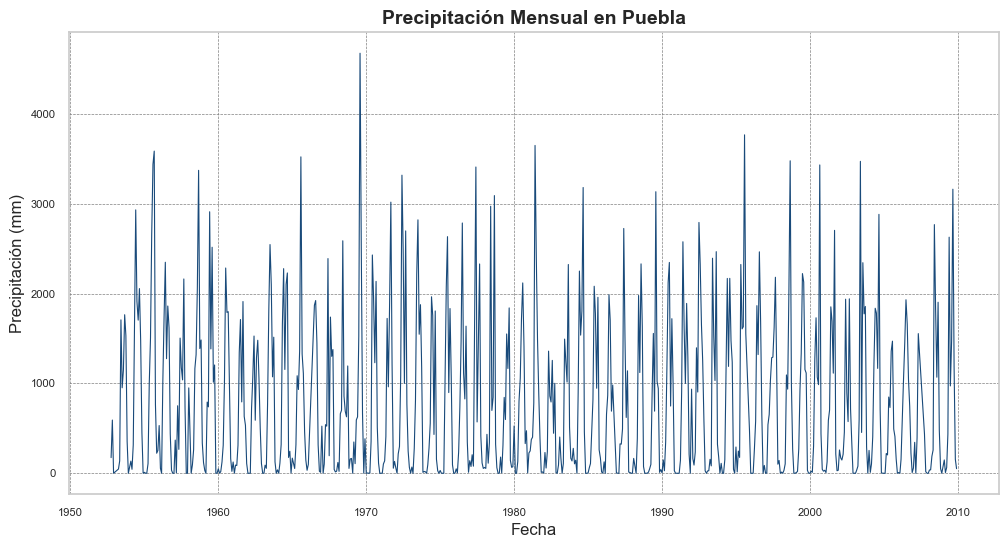

In [7]:
plt.figure()
plt.plot(pre, linewidth=0.8)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en Puebla")
plt.savefig('imagenes/01-precipitacion.svg', bbox_inches='tight')
plt.show()

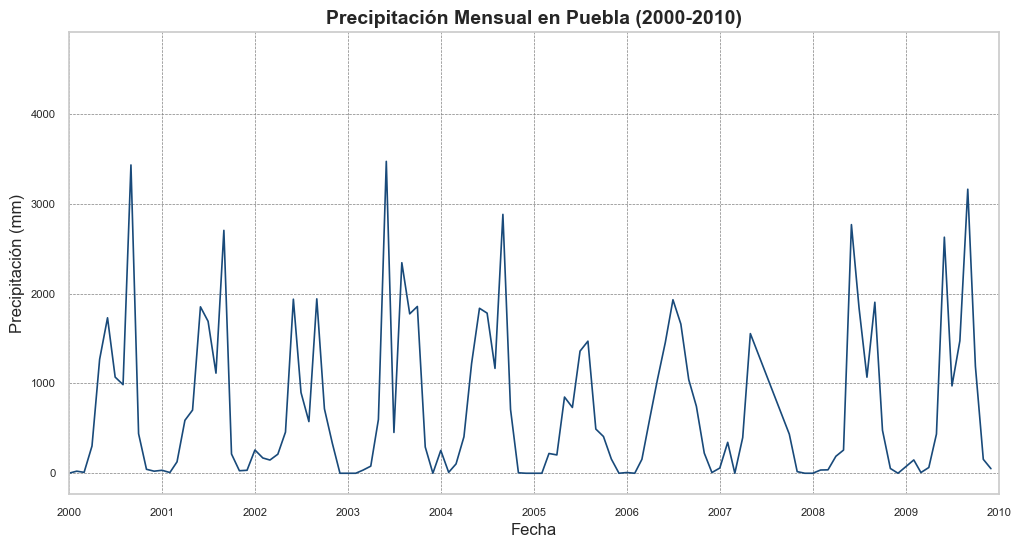

In [8]:
plt.figure()
plt.plot(pre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en Puebla (2000-2010)")
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2010-01-01')) 
plt.savefig('imagenes/01-2-precipitacion.svg', bbox_inches='tight')
plt.show()

# **TRAIN Y TEST**

In [9]:
# Partir la serie para train y test
pre_total = pre.copy()          # Copia de la serie original

# Todas hasta los ultimos 12 meses
pre = pre_total[:-12]           # Entrenamiento: todos menos los últimos 12 meses
pre_test = pre_total[-12:]      # Test: últimos 12 meses

# **TRANSFORMACIÓN**

Definición **matemática** de la **transformación Yeo-Johnson**, como se encuentra en la literatura estadística (propuesta por Ingram Olkin y I. Paul Yeo & R. J. Johnson en 2000).

Sea $x \in \mathbb{R}$ un valor (puede ser negativo, cero o positivo). La transformación $T(x; \lambda)$ se define como:

$$
T(x; \lambda) =
\begin{cases}
\frac{[(x + 1)^\lambda - 1]}{\lambda} & \text{si } x \geq 0, \, \lambda \ne 0 \\
\log(x + 1) & \text{si } x \geq 0, \, \lambda = 0 \\
-\frac{[(-x + 1)^{2 - \lambda} - 1]}{2 - \lambda} & \text{si } x < 0, \, \lambda \ne 2 \\
-\log(-x + 1) & \text{si } x < 0, \, \lambda = 2
\end{cases}
$$

## **ESTIMADOR PUNTUAL**

In [10]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

In [11]:
X = pre.values.reshape(-1, 1)

# Ajuste original para obtener lambda estimado
pt = PowerTransformer(method='yeo-johnson', standardize=False)
ypre = pt.fit_transform(X)
lambda_est = pt.lambdas_[0]

In [12]:
print("Lambda estimado:", pt.lambdas_)  # Obtener el valor lambda estimado

Lambda estimado: [0.23849441]


## **INTERVALO DE CONFIANZA**

In [13]:
# Bootstrap para el IC de lambda
n_boot = 1000
lambdas_boot = []

for _ in range(n_boot):
    sample = np.random.choice(X.flatten(), size=len(X), replace=True).reshape(-1, 1)
    pt_boot = PowerTransformer(method='yeo-johnson', standardize=False)
    pt_boot.fit(sample)
    lambdas_boot.append(pt_boot.lambdas_[0])

# Calcular percentiles para el intervalo de confianza al 95%
ci_lower = np.percentile(lambdas_boot, 2.5)
ci_upper = np.percentile(lambdas_boot, 97.5)

print(f"Estimación de λ: {lambda_est:.4f}")
print(f"IC 95% para λ: ({ci_lower:.4f}, {ci_upper:.4f})")


Estimación de λ: 0.2385
IC 95% para λ: (0.2072, 0.2702)


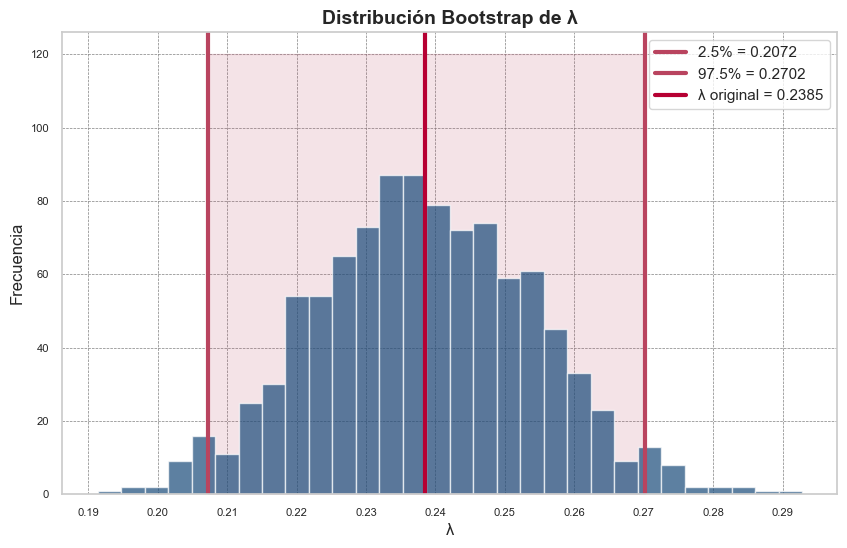

In [14]:
# Gráfico opcional del histograma de los λ bootstrap
plt.figure(figsize=(10, 6))
plt.fill_betweenx([0, 120], ci_lower, ci_upper, color=sns.color_palette()[4], alpha=0.15)
plt.hist(lambdas_boot, bins=30, alpha=0.7, edgecolor='white')
plt.axvline(ci_lower, label=f'2.5% = {ci_lower:.4f}', color=sns.color_palette()[4], linewidth=3)
plt.axvline(ci_upper, label=f'97.5% = {ci_upper:.4f}', color=sns.color_palette()[4], linewidth=3)
plt.axvline(lambda_est, label=f'λ original = {lambda_est:.4f}', color=sns.color_palette()[1], linewidth=3)
plt.title('Distribución Bootstrap de λ')
plt.xlabel('λ')
plt.ylabel('Frecuencia')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.01))
plt.savefig('imagenes/02-lambda-yj-bootstrapping.svg', bbox_inches='tight')
plt.show()

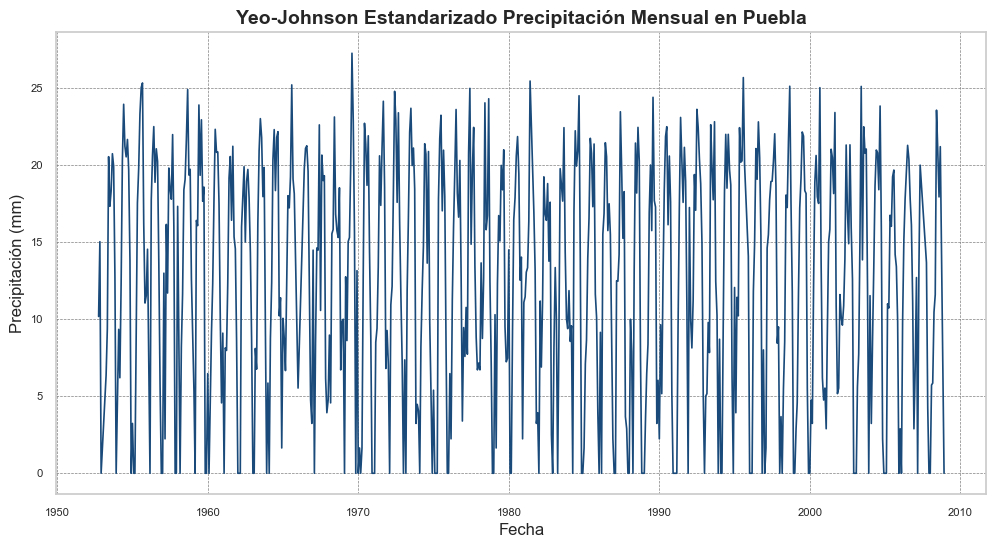

In [15]:
plt.figure()
plt.plot(date[:-12], ypre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Yeo-Johnson Estandarizado Precipitación Mensual en Puebla")
plt.savefig('imagenes/03-precipitacion_yeo_johnson.svg', bbox_inches='tight')
plt.show()

# **ESTACIONARIEDAD**

In [16]:
from statsmodels.tsa.stattools import adfuller  

In [17]:
adfuller(ypre)

(-6.885194656270809,
 1.4004074124320789e-09,
 16,
 643,
 {'1%': -3.440560883168159,
  '5%': -2.8660454146233434,
  '10%': -2.569169329058723},
 3742.2478512367543)

```text
Estadístico ADF         = -6.885  
Valor-p                 = 1.40e-09  
Número de rezagos       = 16  
Número de observaciones = 643  
Valores críticos:
    1%  -> -3.4406
    5%  -> -2.8660
    10% -> -2.5692
Log-likelihood          = 3742.248
```


- El estadístico ADF es $-6.885$, menor que los valores críticos a los niveles del 1%.  
- El valor-p es $1.40 × 10^{-9}$ mucho menor al nivel de significancia $\alpha$ = 0.05.

Por lo tanto, se rechaza la hipótesis nula, es decir, se concluye que la serie es estacionaria.

## **AUTOCORRELACIONES**

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt
from fac_y_facps_significativas import *    # Este es el archivo que se usa para el curso

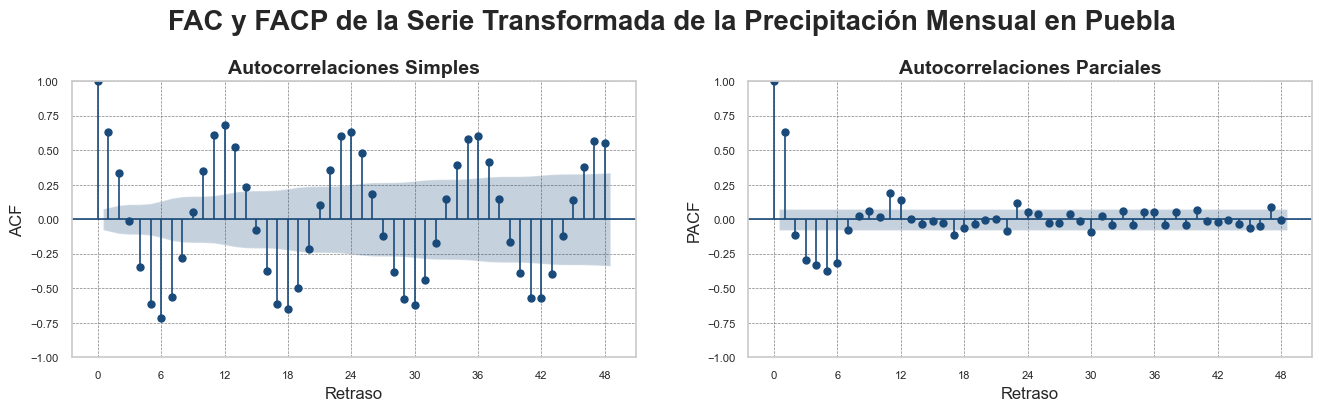

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(ypre, lags=48, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')
axs[0].set_xlabel('Retraso')
axs[0].set_ylabel('ACF')

plot_pacf(ypre, lags=48, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].set_xlabel('Retraso')
axs[1].set_ylabel('PACF')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

plt.subplots_adjust(top=0.8)
plt.suptitle('FAC y FACP de la Serie Transformada de la Precipitación Mensual en Puebla', fontsize=20, weight='bold')
plt.savefig('imagenes/04-acf_pacf.svg', bbox_inches='tight')
plt.show()


In [21]:
fac = FAC(len(ypre), acf(ypre, nlags=48)[1:] )

Valores de autocorrelacion significativos:
r1: 0.6331507478065657
r2: 0.3325589848089995
r4: -0.34296193826244037
r5: -0.6128788441981866
r6: -0.7155687723661789
r7: -0.5667143985229659
r8: -0.28172958031763784
r10: 0.3463910038547193
r11: 0.613973423252698
r12: 0.6833003454277806
r13: 0.5238197525884692
r14: 0.23526370655336934
r16: -0.3766524949603997
r17: -0.6133232329123164
r18: -0.6522050881633412
r19: -0.49864844118107393
r22: 0.3581357207867556
r23: 0.6051041828734447
r24: 0.6329527484728269
r25: 0.4787907060076014
r28: -0.38306266194938177
r29: -0.5771240646474322
r30: -0.6219569734501011
r31: -0.4411616763523178
r34: 0.3905997714697266
r35: 0.5842211455257491
r36: 0.6063157128704039
r37: 0.4130632672706336
r40: -0.3905344873357951
r41: -0.5677702589671871
r42: -0.5689341833781766
r43: -0.3981104753267792
r46: 0.37592835666967467
r47: 0.570474909390521
r48: 0.5490665087242426


In [22]:
facp = FACP(len(ypre), pacf(ypre, nlags=48)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: 0.6341115228411737
rho 2: -0.11461335623878179
rho 3: -0.30004544277930034
rho 4: -0.33135817233932896
rho 5: -0.3810998270143429
rho 6: -0.3247926911127918
rho 7: -0.08061163300684886
rho 11: 0.20003090790089628
rho 12: 0.15325816424082736
rho 17: -0.12292322538615767
rho 22: -0.08358889406877652
rho 23: 0.12630684698989098
rho 30: -0.10284459237091616
rho 47: 0.09892532485023216


# **MODELADO**

Luego de buscar el mejor modelo, se obtuvieron estos resultados

<pre>
(1) ARIMA(4,0,0)(1,0,1)[12], AIC=3966.056  
(2) ARIMA(4,0,1)(1,0,1)[12], AIC=3967.978  
(3) ARIMA(4,0,0)(1,0,2)[12], AIC=3968.090  
(4) ARIMA(4,0,0)(2,0,1)[12], AIC=3968.231  
(5) ARIMA(5,0,0)(1,0,1)[12], AIC=3973.839  
(6) ARIMA(3,0,0)(1,0,1)[12], AIC=3979.490  
(7) ARIMA(3,0,0)(1,0,2)[12], AIC=3981.431  
(8) ARIMA(3,0,0)(2,0,1)[12], AIC=3981.441  
(9) ARIMA(2,0,0)(1,0,1)[12], AIC=3982.753  
(10) ARIMA(2,0,0)(1,0,2)[12], AIC=3984.673  
(11) ARIMA(2,0,0)(2,0,1)[12], AIC=3984.687  
(12) ARIMA(1,0,0)(1,0,1)[12], AIC=3986.540  
(13) ARIMA(1,0,0)(1,0,2)[12], AIC=3988.490  
(14) ARIMA(1,0,0)(2,0,1)[12], AIC=3988.500   
(15) ARIMA(4,0,0)(2,0,0)[12], AIC=4001.353  
(16) ARIMA(3,0,0)(2,0,0)[12], AIC=4014.781  
(17) ARIMA(2,0,0)(2,0,0)[12], AIC=4018.072  
(18) ARIMA(1,0,0)(2,0,0)[12], AIC=4023.570  
(19) ARIMA(4,0,0)(1,0,0)[12], AIC=4037.099  
(20) ARIMA(4,0,0)(0,0,2)[12], AIC=4041.324  
(21) ARIMA(0,0,0)(1,0,1)[12], AIC=4045.176  
(22) ARIMA(4,0,0)(0,0,1)[12], AIC=4054.553  
(23) ARIMA(3,0,0)(1,0,0)[12], AIC=4063.736  
(24) ARIMA(2,0,0)(1,0,0)[12], AIC=4071.669  
(25) ARIMA(1,0,0)(1,0,0)[12], AIC=4074.805  
(26) ARIMA(4,0,0)(0,0,0)[12], AIC=4085.184  
(27) ARIMA(3,0,0)(0,0,2)[12], AIC=4086.016  
(28) ARIMA(3,0,0)(0,0,1)[12], AIC=4106.841  
(29) ARIMA(2,0,0)(0,0,2)[12], AIC=4110.743  
(30) ARIMA(1,0,0)(0,0,2)[12], AIC=4110.941  
(31) ARIMA(1,0,0)(0,0,1)[12], AIC=4138.416  
(32) ARIMA(2,0,0)(0,0,1)[12], AIC=4140.415  
(33) ARIMA(3,0,0)(0,0,0)[12], AIC=4160.393  
(34) ARIMA(0,0,1)(0,0,1)[12], AIC=4193.130  
(35) ARIMA(2,0,0)(0,0,0)[12], AIC=4220.945  
(36) ARIMA(1,0,0)(0,0,0)[12], AIC=4227.799  
(37) ARIMA(0,0,0)(0,0,0)[12], AIC=4565.249  
</pre>

Pero ninguno cumple los supuestos, por lo que es necesaria una diferencia estacional. La información a detalle se encuentra en `02-Encontrar-los-Mejores-Modelos` y `03-Encontrar-Modelos-que-Cumplan`.